In [2]:
!pwd

/home/mln/GIT/0_EXPLORE/github/astronomer-codespaces-test/data


In [10]:
import pandas as pd


df = pd.read_parquet('2024-06-04.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863464 entries, 0 to 863463
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype                                
---  ------                       --------------   -----                                
 0   id                           0 non-null       float64                              
 1   record_timestamp             863464 non-null  datetime64[us, pytz.FixedOffset(120)]
 2   stationcode                  863464 non-null  object                               
 3   ebike                        863464 non-null  int64                                
 4   mechanical                   863464 non-null  int64                                
 5   duedate                      863464 non-null  object                               
 6   numbikesavailable            863464 non-null  int64                                
 7   numdocksavailable            863464 non-null  int64                                

┌─────────┬──────────────────────┬─────────────┬───┬──────────────────────┬────────────────────┬────────────────────┐
│   id    │   record_timestamp   │ stationcode │ … │         name         │      latitude      │     longitude      │
│ double  │ timestamp with tim…  │   varchar   │   │       varchar        │       double       │       double       │
├─────────┼──────────────────────┼─────────────┼───┼──────────────────────┼────────────────────┼────────────────────┤
│  1268.0 │ 2024-06-02 20:37:0…  │ 10001       │ … │ René Boulanger - L…  │         48.8685433 │          2.3600032 │
│  1267.0 │ 2024-06-02 20:37:0…  │ 10001       │ … │ René Boulanger - L…  │         48.8685433 │          2.3600032 │
│  1141.0 │ 2024-06-02 20:37:0…  │ 10001       │ … │ René Boulanger - L…  │         48.8685433 │          2.3600032 │
│  1142.0 │ 2024-06-02 20:37:0…  │ 10001       │ … │ René Boulanger - L…  │         48.8685433 │          2.3600032 │
│  2539.0 │ 2024-06-02 20:37:0…  │ 10004       │ … │ Met

In [2]:
import pandas as pd
import duckdb

file_path = "merged_data.parquet"

df = duckdb.read_parquet(file_path) 
df.df().info()

In [1]:
import pandas as pd
import duckdb

# Start an in-memory DuckDB database
con = duckdb.connect()

# Path to your Parquet file
file_path = "merged_data.parquet"

# Load the Parquet file into a DuckDB table
con.execute(
    f"""
    CREATE TABLE velib_global AS 
        SELECT record_timestamp, stationcode, numbikesavailable, mechanical, ebike
        FROM read_parquet('{file_path}')
    """
)



In [3]:
con.execute("SELECT * FROM velib_global").df().info()


CatalogException: Catalog Error: Table with name velib_global does not exist!
Did you mean "pg_am"?

In [10]:
!poetry add matplotlib

Using version ^3.9.1 for matplotlib

Updating dependencies
Resolving dependencies... (0.6s)

Package operations: 7 installs, 0 updates, 0 removals

  - Installing contourpy (1.2.1): Pending...
  - Installing cycler (0.12.1): Pending...
  - Installing fonttools (4.53.1): Pending...
  - Installing kiwisolver (1.4.5): Pending...
  - Installing pillow (10.4.0): Pending...
  - Installing pyparsing (3.1.2): Pending...
  - Installing pyparsing (3.1.2): Pending...
  - Installing pillow (10.4.0): Downloading... 0%
  - Installing pyparsing (3.1.2): Pending...
  - Installing fonttools (4.53.1): Pending...
  - Installing kiwisolver (1.4.5): Pending...
  - Installing pillow (10.4.0): Downloading... 0%
  - Installing pyparsing (3.1.2): Pending...
  - Installing cycler (0.12.1): Downloading... 0%
  - Installing fonttools (4.53.1): Pending...
  - Installing kiwisolver (1.4.5): Pending...
  - Installing pillow (10.4.0): Downloading... 0%
  - Installing pyparsing (3.1.2): Pending...
  - Installing pypar

<Axes: xlabel='record_timestamp'>

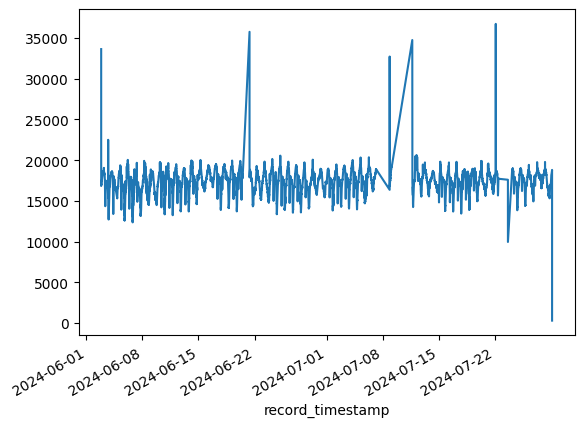

In [19]:
agg = con.execute(
       """
       SELECT record_timestamp, SUM(numbikesavailable) AS total 
       FROM velib_global
       GROUP BY record_timestamp
       ORDER BY record_timestamp ASC;
"""
)
agg_df = agg.df()

ts = pd.Series(agg_df['total'].values, index=agg_df['record_timestamp'])

ts.plot()


In [16]:
import pandas as pd
import duckdb


df = pd.read_parquet('merged_data.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51935527 entries, 0 to 51935526
Data columns (total 15 columns):
 #   Column             Dtype                  
---  ------             -----                  
 0   id                 float64                
 1   record_timestamp   datetime64[us, Etc/UTC]
 2   stationcode        object                 
 3   ebike              int64                  
 4   mechanical         int64                  
 5   duedate            object                 
 6   numbikesavailable  int64                  
 7   numdocksavailable  int64                  
 8   capacity           int64                  
 9   is_renting         object                 
 10  is_installed       object                 
 11  is_returning       object                 
 12  name               object                 
 13  latitude           float64                
 14  longitude          float64                
dtypes: datetime64[us, Etc/UTC](1), float64(3), int64(5), object(6)
m

In [8]:
import pandas as pd



df = pd.read_parquet('locations_backup.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stationcode                  1496 non-null   object 
 1   name                         1496 non-null   object 
 2   latitude                     1496 non-null   float64
 3   longitude                    1496 non-null   float64
 4   nom_arrondissement_communes  1496 non-null   object 
dtypes: float64(2), object(3)
memory usage: 58.6+ KB


In [20]:
import pandas as pd



df = pd.read_csv('donnees-synop-essentielles-omm.csv')
df.info()

ParserError: Error tokenizing data. C error: Expected 5 fields in line 5, saw 8
